# NBA Stats

Projeto Interdisciplinar
- **D2APR - Aprendizado de Máquina e Reconhecimento de Padrões**
- **D2TEC - Tecnologias de Big Data**

Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

## 1. Informações Gerais

### 1.1. Contexto do problema

A *National Basketball Association* (NBA) é uma liga profissional de basquete da América do Norte. A liga é composta por 30 times (29 nos Estados Unidos e 1 no Canadá) e é uma das quatro principais ligas esportivas profissionais dos Estados Unidos e Canadá. É a principal liga profissional de basquete masculino do mundo$^{[1]}$.

A NBA foi fundada na cidade de Nova York em 6 de junho de 1946, como *Basketball Association of America* (BAA). Ela mudou seu nome para *National Basketball Association* em 3 de agosto de 1949, após a fusão com a concorrente *National Basketball League* (NBL). No formato atual, a temporada regular da NBA vai de outubro a abril, com cada equipe jogando 82 jogos. As equipes estão dividas em duas conferências e as 8 melhores classificadas de cada conferência disputam a pós-temporada (playoff) em partidas melhores de 7 jogos. Os campeões de cada conferência se enfrentam na final, pelo titulo da temporada, geralmente no mês de junho. Em 2020, os jogadores da NBA foram os atletas mais bem pagos do mundo em média de salário anual por jogador $^{[1]}$.

Na América do Norte, a NBA é a **terceira liga esportiva profissional mais rica**, depois da *National Football League* (NFL) e da *Major League Baseball* (MLB) em receita, e está entre as quatro maiores do mundo $^{[1]}$. Em 2021 a NBA completou 75 anos de fundação e diversas homenagens a jogadores e partidas históricas foram feitas neste período.

A NBA possui um histórico de diversas estatísticas dos jogadores e times de todas as temporadas desde a sua criação. Alguns sites, como o [Basketball Reference](https://www.basketball-reference.com/) e o [site oficial da NBA](https://www.nba.com/stats/) possuem uma gigantesca base de dados disponíveis para consulta. As principais estatísticas gerais dos jogadores são: **pontos**, **rebotes**, **assistências**, **tocos** e **roubos**, além de estatísticas percentuais, como porcentagem de arremessos convertidos.

A NBA possui um **limite salarial na folha de pagamento** de jogadores de cada um dos times. Esse limite não é rígido como em outras ligas americanas, mas o estouro do teto salarial leva os times a pagarem multas que aumentam exponencialmente conforme o aumento dos gastos. Na temporada 2021-22 o limite salarial é de 112,4 milhões $^{[2]}$.

Existe uma enorme quantidades de regras estipuladas para definir o salário de um jogador. Tendo em vista o limite que um time deve se basear para evitar ser multado, **a definição dos contratos se torna crucial** para a boa formação de um time.

Inspirado pelo jogador de futebol Kevin De Bruyne, que trocou os tradicionais agentes por especialistas em *Big Data* para calcular o seu valor e a sua importância, tornando-se o jogador com maior salário do seu time $^{[3]}$, o objetivo desse estudo é tentar **entender a dinâmica dos salários dos atletas da NBA em relação a suas características e estatísticas**.

Fontes de pesquisa:

1. [National Basketball Association](https://en.wikipedia.org/wiki/National_Basketball_Association)
2. [NBA Salary Cap](https://www.nba.com/news/salary-cap-set-at-112-4-million-for-2021-22-season)
3. [Kevin De Bruyne uses data analysts to broker £83m Man City contract without agent](https://www.mirror.co.uk/sport/football/news/kevin-de-bruyne-uses-data-23870686)

### 1.2. Objetivos do projeto

Usar as estatísticas do jogadores para criar um modelo por temporada no qual estime o salário real dos jogadores e deixe isso disponível para consulta na web.

### 1.3. Conhecendo os dados

#### 1.3.1. Obtenção dos dados

O primeiro desafio é a obtenção dos dados necessários para cumprir os objetivos. Apesar da disponibilidade por diversas fontes de dados estatísticos de jogadores da NBA, encontrar esses dados todos agrupados de forma organizada, completa e atualizada não é tão simples.

A melhor forma encontrada para obtenção de os dados estatísticos de toda a carreira de um jogador foi utilizando a [nba_api](https://github.com/swar/nba_api/) para python. Desta forma, conseguimos informações completas e organizadas, com a única problemática de que para obter informações de cada jogador é necessária uma requisição ao site da NBA (o que significa 4.723 requisições). Para contornar esta dificuldade, desenvolvemos um algorítmo para realizar as requisições de forma mais "compassada" (e evitar acessos negados por *flood* ao servidor) e que realiza o salvamento em disco a cada nova informação obtida. Com isso, caso haja problema no meio do processo, conseguimos retomar do ponto em que ele parou. Os [*logs*](../logs/getstats.log) da operação podem ser consultados.

A outra parte da aquisição dos dados consiste nos salários de cada jogador para cada temporada (nossa variável alvo do modelo). Conseguimos encontrar essas informações [organizadas tabularmente](https://hoopshype.com/salaries/players/) para as temporadas desde 1990. Neste caso, utilizamos uma técnica de [web scraping](https://en.wikipedia.org/wiki/Web_scraping) com [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) para extração. Após obter as tabelas salariais (uma por temporada), precisamos realizar algumas transformações para adequar ao formato similar ao gerado para as estatísticas.

Todo o processo de extração dos dados e geração do *dataset* final utilizado no decorrer do projeto está implementado e descrito no [notebook de extração de dados](./NBAstats_data_gathering.ipynb).

#### 1.3.2. Dicionário de Dados

O resultado do processo de extração é a geração de um *dataset* contendo 30 colunas, descritas a seguir:

- `PLAYER_NAME` (string): Nome do jogador
- `SEASON_ID` (string): Temporada
- `PLAYER_ID` (int): ID do jogador
- `LEAGUE_ID` (int): ID da liga
- `TEAM_ID` (int): ID do time
- `TEAM_ABBREVIATION` (string): Sigla do time
- `PLAYER_AGE` (float): Idade do Jogador
- `GP` (int): Número de jogos disputados pelo jogador na temporada
- `GS` (float): Número de jogos em que o jogador começou como titular
- `MIN` (float): Minutos jogados
- `FGM` (int): Arremessos convertidos
- `FGA` (int): Arremessos tentados
- `FG_PCT` (float): Percentual de arremessos convertidos
- `FG3M` (float): Arremessos convertidos de 3 pontos
- `FG3A` (float): Arremessos tentados de 3 pontos
- `FG3_PCT` (float): Percentual de arremessos convertidos de 3 pontos
- `FTM` (int): Arremessos convertidos de lances livres
- `FTA` (int): Arremessos tentados de lances livres
- `FT_PCT` (float): Percentual de arremessos convertidos de lances livres
- `OREB` (float): Rebotes ofensivos
- `DREB` (float): Rebotes defensivos
- `REB` (float): Rebotes totais
- `AST` (int): Assistencias
- `STL` (float): Roubos
- `BLK` (float): Bloqueios
- `TOV` (float): Desperdicios de bola (Turnover)
- `PF` (int): Faltas cometidas (Máximo 6 por partida)
- `PTS` (int): Pontos convertidos
- `SALARY_NOMINAL` (float): Salário nominal
- `SALARY_REAL` (float): Salário corrigido pela inflação

## 2. Configurações iniciais

### 2.1. Bibliotecas e importação dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuração de estilo dos gráficos
sns.set_theme(
    style='white',
    rc={
        'axes.titlesize': 16,
        'axes.labelsize': 12,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.grid.axis': 'y',
        'axes.spines.top': False
    }
)

In [3]:
#Importando o dataset
DATA_PATH = '../data'#'https://raw.githubusercontent.com/ciencia-dados-ifsp-grupo5/NBAstats/main/data'

df = pd.read_csv(f'{DATA_PATH}/player.csv')
print(f'Os dados possuem {df.shape[0]} registros divididos em {df.shape[1]} colunas')

Os dados possuem 16341 registros divididos em 30 colunas


### 2.2. Visão geral dos dados

In [4]:
df.head(3)

,PLAYER_NAME,SEASON_ID,PLAYER_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SALARY_NOMINAL,SALARY_REAL
0,A.C. Green,1990-91,920,0,1610612747,LAL,27.0,82,21.0,2164.0,...,315.0,516.0,71,59.0,23.0,99.0,117,750,1750000.0,3473015.0
1,A.C. Green,1991-92,920,0,1610612747,LAL,28.0,82,53.0,2902.0,...,456.0,762.0,117,91.0,36.0,111.0,141,1116,1750000.0,3317240.0
2,A.C. Green,1992-93,920,0,1610612747,LAL,29.0,82,55.0,2819.0,...,424.0,711.0,116,88.0,39.0,116.0,149,1051,1750000.0,3217865.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16341 entries, 0 to 16340
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_NAME        16341 non-null  object 
 1   SEASON_ID          16341 non-null  object 
 2   PLAYER_ID          16341 non-null  int64  
 3   LEAGUE_ID          16341 non-null  int64  
 4   TEAM_ID            16341 non-null  int64  
 5   TEAM_ABBREVIATION  16341 non-null  object 
 6   PLAYER_AGE         16341 non-null  float64
 7   GP                 16341 non-null  int64  
 8   GS                 16341 non-null  float64
 9   MIN                16341 non-null  float64
 10  FGM                16341 non-null  int64  
 11  FGA                16341 non-null  int64  
 12  FG_PCT             16341 non-null  float64
 13  FG3M               16341 non-null  float64
 14  FG3A               16341 non-null  float64
 15  FG3_PCT            16341 non-null  float64
 16  FTM                163

In [6]:
# Dados nulos
print(f'O dataset possui {df.isnull().sum().sum()} valores Nulos')

O dataset possui 414 valores Nulos


In [7]:
# Atributos com valores nulos
df.isnull().sum()[lambda x: x > 0]

SALARY_REAL    414
dtype: int64

In [8]:
# Dados duplicados
print(f'O dataset possui {df.duplicated().sum()} dados duplicados')

O dataset possui 0 dados duplicados


In [9]:
df[df['SALARY_REAL'].isnull()].SEASON_ID.value_counts()

2021-22    414
Name: SEASON_ID, dtype: int64

O *dataset* não possui dados duplicados, porém existem **414 valores nulos**. Todos se encontram na coluna `SALARY_REAL` e são referentes a temporada 2021-22. Isto faz sentido, uma vez que os valores salariais de temporadas anteriores foram deflacionados a preço de 2021. No caso desta temporada 2021-22, o valor real do salário é equivalente ao seu valor nominal.

## 3. Pré-processamento

### 3.1. Limpeza dos dados

Os dados são referentes às estatísticas de todos os jogadores desde a temporada 1990-91 até 2021-22. Esta última temporada ainda não foi finalizada e os dados não estão completos. Por este motivo, ela será excluída da análise. Para simplificar a identificação, vamos considerar o ano de encerramento da temporada como referência para a mesma.

In [10]:
df_clean = df.copy()

# Retirar temporada 2021-22
df_clean = df_clean.query('SEASON_ID != "2021-22"')

# Simplificando a identificação da temporada
df_clean['SEASON_ID'] = df_clean['SEASON_ID'].str.slice(0, 4).astype(int) + 1

df_clean.head()

,PLAYER_NAME,SEASON_ID,PLAYER_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SALARY_NOMINAL,SALARY_REAL
0,A.C. Green,1991,920,0,1610612747,LAL,27.0,82,21.0,2164.0,...,315.0,516.0,71,59.0,23.0,99.0,117,750,1750000.0,3473015.0
1,A.C. Green,1992,920,0,1610612747,LAL,28.0,82,53.0,2902.0,...,456.0,762.0,117,91.0,36.0,111.0,141,1116,1750000.0,3317240.0
2,A.C. Green,1993,920,0,1610612747,LAL,29.0,82,55.0,2819.0,...,424.0,711.0,116,88.0,39.0,116.0,149,1051,1750000.0,3217865.0
3,A.C. Green,1994,920,0,1610612756,PHX,30.0,82,55.0,2825.0,...,478.0,753.0,137,70.0,38.0,100.0,142,1204,1885000.0,3365286.0
4,A.C. Green,1995,920,0,1610612756,PHX,31.0,82,52.0,2687.0,...,475.0,669.0,127,55.0,31.0,114.0,146,916,6472600.0,11274438.0


Durante uma temporada, os jogadores podem ser transferidos de time. Nestes casos, o *dataset* possui as estatistícas do jogador em cada um dos times e um valor agrupado total do jogador na temporada, em que o valor de `TEAM_ABBREVITAION` é informado como `TOT`. Um exemplo é o do jogador *AJ Price*, que na temporada 2015 jogou pelos times de *Indiana*, *Cleveland* e *Phoenix*.

In [11]:
# Exemplo de um jogador com mais de um time na mesma temporada
df_clean.query('PLAYER_NAME == "AJ Price" & SEASON_ID == 2015')

,PLAYER_NAME,SEASON_ID,PLAYER_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SALARY_NOMINAL,SALARY_REAL
23,AJ Price,2015,201985,0,1610612754,IND,28.0,10,0.0,193.0,...,12.0,14.0,27,4.0,0.0,10.0,9,105,493917.0,534230.0
24,AJ Price,2015,201985,0,1610612739,CLE,28.0,11,0.0,87.0,...,11.0,15.0,13,3.0,0.0,3.0,1,22,493917.0,534230.0
25,AJ Price,2015,201985,0,1610612756,PHX,28.0,5,0.0,44.0,...,3.0,3.0,6,0.0,0.0,1.0,5,6,493917.0,534230.0
26,AJ Price,2015,201985,0,0,TOT,28.0,26,0.0,324.0,...,26.0,32.0,46,7.0,0.0,14.0,15,133,493917.0,534230.0


Para tratar estes casos, vamos excluir todos os registros de jogadores que aparecem mais de uma vez na mesma temporada, com execssão do registro em que `TEAM_ABBREVIATION` é o total `TOT`.

In [12]:
# Verificando a quantidade de registros de jogadores que possuem mais de um time por temporada
jogadores_duplicados = df_clean[df_clean.duplicated(subset=['PLAYER_NAME', 'SEASON_ID'])].shape[0]
print(f"Jogadores com estatísticas duplicadas: {jogadores_duplicados}")

# Retirar os jogadores duplicados cujos registros tenham valor de TEAM_ABBREVIATION != "TOT"
index_duplicados = df_clean[df_clean.duplicated(subset=['PLAYER_NAME', 'SEASON_ID'], keep=False)].query('TEAM_ABBREVIATION != "TOT"').index
df_clean.drop(index_duplicados, axis = 0, inplace = True)

# Verificação pós-processamento
jogadores_duplicados = df_clean[df_clean.duplicated(subset=['PLAYER_NAME', 'SEASON_ID'])].shape[0]
print(f"Jogadores com estatísticas duplicadas pós-processamento: {jogadores_duplicados}")

Jogadores com estatísticas duplicadas: 2997
Jogadores com estatísticas duplicadas pós-processamento: 0


Vamos salvar o *dataset* limpo.

In [13]:
df_clean.to_csv(f'{DATA_PATH}/player_clean.csv', index=False)

Este arquivo será usado para carregar os registros de jogadores em uma base de dados SQL. Neste projeto, construímos uma base *MySQL* utilizando o [*Amazon Relational Database Service (RDS)*](https://aws.amazon.com/rds/). O procedimento é feito no [notebook de criação do banco de dados de jogadores](./NBAstats_db_creation.ipynb)

Por fim, vamos excluir algumas colunas que são referentes apenas a identificação (`PLAYER_ID`, `LEAGUE_ID`, `TEAM_ID` e `TEAM_ABBREVIATION`).

In [14]:
df_clean = df_clean.drop(columns=['PLAYER_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION']).set_index('PLAYER_NAME')

### 3.2. Separação da base de teste

Após a limpeza dos dados, vamos dividir a base em dados de treino e teste. Para montar um modelo que seja consistente, os dados de teste não devem ser usados para analisar e preparar a base, de modo que a divisão deve ser feita anteriormente.

Vamos estratificar a divisão com o parâmetro de temporada. Esta é uma informação determinante para definição dos salários.

In [15]:
df_clean

,SEASON_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SALARY_NOMINAL,SALARY_REAL
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
A.C. Green,1991,27.0,82,21.0,2164.0,258,542,0.476,11.0,55.0,...,315.0,516.0,71,59.0,23.0,99.0,117,750,1750000.0,3473015.0
A.C. Green,1992,28.0,82,53.0,2902.0,382,803,0.476,12.0,56.0,...,456.0,762.0,117,91.0,36.0,111.0,141,1116,1750000.0,3317240.0
A.C. Green,1993,29.0,82,55.0,2819.0,379,706,0.537,16.0,46.0,...,424.0,711.0,116,88.0,39.0,116.0,149,1051,1750000.0,3217865.0
A.C. Green,1994,30.0,82,55.0,2825.0,465,926,0.502,8.0,35.0,...,478.0,753.0,137,70.0,38.0,100.0,142,1204,1885000.0,3365286.0
A.C. Green,1995,31.0,82,52.0,2687.0,311,617,0.504,43.0,127.0,...,475.0,669.0,127,55.0,31.0,114.0,146,916,6472600.0,11274438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zydrunas Ilgauskas,2008,33.0,73,73.0,2222.0,417,879,0.474,0.0,1.0,...,419.0,682.0,104,34.0,120.0,135.0,247,1029,10142156.0,12549039.0
Zydrunas Ilgauskas,2009,34.0,65,65.0,1765.0,342,724,0.472,15.0,39.0,...,333.0,490.0,64,28.0,84.0,90.0,183,838,10841615.0,12773054.0
Zydrunas Ilgauskas,2010,35.0,64,6.0,1339.0,194,438,0.443,11.0,23.0,...,231.0,345.0,48,14.0,50.0,63.0,183,474,11541074.0,13793930.0


In [16]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df_clean,
    test_size=0.2,
    stratify=df_clean['SEASON_ID'],
    random_state=99
)

print(f'Temos {df_train.shape} dados de treino e {df_test.shape} dados de teste')

# Proporção de registros por temporada entre treino e teste
s_train = df_train['SEASON_ID'].value_counts(normalize=True).rename('train %')
s_test = df_test['SEASON_ID'].value_counts(normalize=True).rename('test %')
s_train.to_frame().join(s_test).sort_index(ascending=False)

Temos (10340, 25) dados de treino e (2585, 25) dados de teste


,train %,test %
2021,0.037814,0.037524
2020,0.034913,0.034816
2019,0.037331,0.037524
2018,0.038685,0.038685
2017,0.035106,0.035203
2016,0.034623,0.034429
2015,0.035783,0.035590
2014,0.034526,0.034429
2013,0.034333,0.034429
2012,0.033656,0.033656


## 4. Análise exploratória

### 4.1. Distribuição por temporada

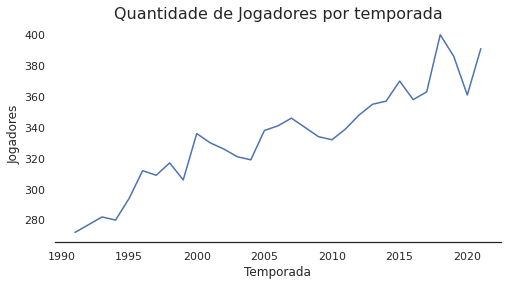

In [17]:
# Quantidade de jogadores por temporada
plt.figure(figsize=(8, 4))

ax = sns.lineplot(x = df_train.groupby('SEASON_ID').count().iloc[:,1].index, 
             y = df_train.groupby('SEASON_ID').count().iloc[:,1])
ax.set_ylabel('Jogadores')
ax.set_xlabel('Temporada')
ax.set_title('Quantidade de Jogadores por temporada')

plt.show()

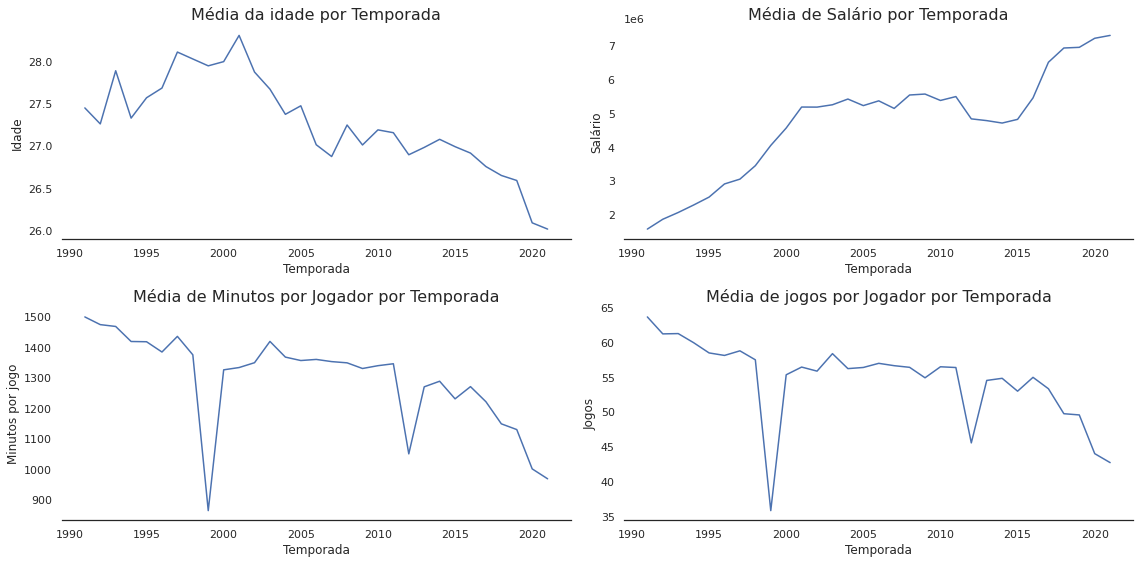

In [18]:
df_train_season = df_train.groupby('SEASON_ID').mean()

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

# Gráfico da média de Idade
sns.lineplot(data = df_train_season, x = df_train_season.index, y = df_train_season['PLAYER_AGE'], ax = ax[0][0])
ax[0][0].set_ylabel('Idade')
ax[0][0].set_xlabel('Temporada')
ax[0][0].set_title('Média da idade por Temporada')

# Gráfico da média de Salário
sns.lineplot(data = df_train_season, x = df_train_season.index, y = df_train_season['SALARY_REAL'], ax = ax[0][1])
ax[0][1].set_ylabel('Salário')
ax[0][1].set_xlabel('Temporada')
ax[0][1].set_title('Média de Salário por Temporada')

# Gráfico da média de Minutos jogados por temporada
sns.lineplot(data = df_train_season, x = df_train_season.index, y = df_train_season['MIN'], ax = ax[1][0])
ax[1][0].set_ylabel('Minutos por jogo')
ax[1][0].set_xlabel('Temporada')
ax[1][0].set_title('Média de Minutos por Jogador por Temporada')

# Gráfico da média de jogos jogados por temporada
sns.lineplot(data = df_train_season, x = df_train_season.index, y = df_train_season['GP'], ax = ax[1][1])
ax[1][1].set_ylabel('Jogos')
ax[1][1].set_xlabel('Temporada')
ax[1][1].set_title('Média de jogos por Jogador por Temporada')

plt.tight_layout()
plt.show()

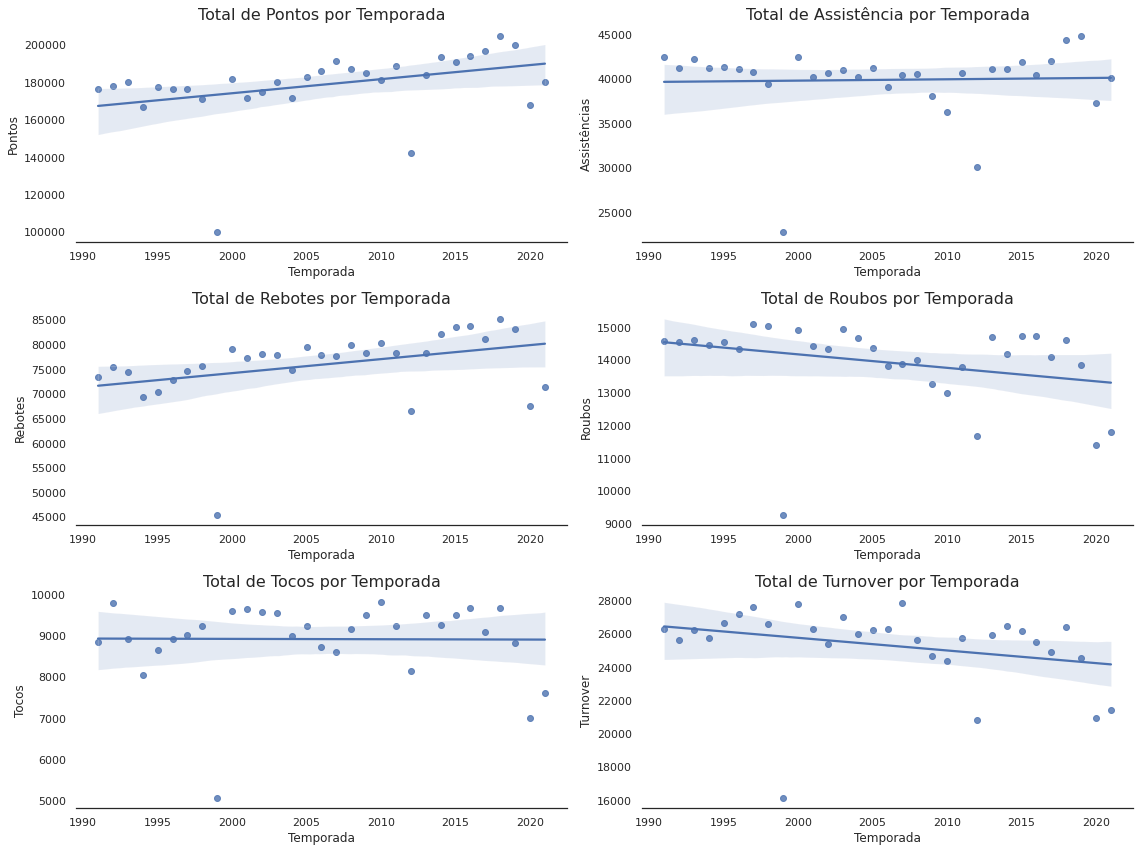

In [19]:
df_train_season = df_train.groupby('SEASON_ID').sum()

fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# Gráfico do total de pontos
sns.regplot(data = df_train_season, x = df_train_season.index, y = df_train_season['PTS'], ax = ax[0][0])
ax[0][0].set_ylabel('Pontos')
ax[0][0].set_xlabel('Temporada')
ax[0][0].set_title('Total de Pontos por Temporada')

# Gráfico do total de assistências
sns.regplot(data = df_train_season, x = df_train_season.index, y = df_train_season['AST'], ax = ax[0][1])
ax[0][1].set_ylabel('Assistências')
ax[0][1].set_xlabel('Temporada')
ax[0][1].set_title('Total de Assistência por Temporada')

# Gráfico do total de Rebotes
sns.regplot(data = df_train_season, x = df_train_season.index, y = df_train_season['REB'], ax = ax[1][0])
ax[1][0].set_ylabel('Rebotes')
ax[1][0].set_xlabel('Temporada')
ax[1][0].set_title('Total de Rebotes por Temporada')

# Gráfico do total de Roubos
sns.regplot(data = df_train_season, x = df_train_season.index, y = df_train_season['STL'], ax = ax[1][1])
ax[1][1].set_ylabel('Roubos')
ax[1][1].set_xlabel('Temporada')
ax[1][1].set_title('Total de Roubos por Temporada')

# Gráfico do total de Tocos
sns.regplot(data = df_train_season, x = df_train_season.index, y = df_train_season['BLK'], ax = ax[2][0])
ax[2][0].set_ylabel('Tocos')
ax[2][0].set_xlabel('Temporada')
ax[2][0].set_title('Total de Tocos por Temporada')

# Gráfico do total de Turnover
sns.regplot(data = df_train_season, x = df_train_season.index, y = df_train_season['TOV'], ax = ax[2][1])
ax[2][1].set_ylabel('Turnover')
ax[2][1].set_xlabel('Temporada')
ax[2][1].set_title('Total de Turnover por Temporada')

plt.tight_layout()
plt.show()

Pelos gráficos é possível ver que o número de jogadores por temporadas aumentou com o passar dos anos, acompanhado pelo aumento da média salarial e a redução da idade média dos jogadores. Esse aumento de jogadores fez com que a média de minutos e a quantidade de jogos que os jogadores fizeram por temporada reduzisse também.

Além disso, o total de pontos e rebotes totais por temporada tem aumentado, enquanto o volume total de roubos e turnover têm demonstrado uma tendência de queda. A quantidade de tocos e assistências não indica nenhuma variação.

Dois *outliers* são bem visíveis pelos gráficos.Nos anos de [1999](https://pt.wikipedia.org/wiki/Locaute_da_NBA_de_1998-99) e [2011](https://pt.wikipedia.org/wiki/Locaute_da_NBA_de_2011) ocorreram locautes na NBA devido à divergencias entre os jogadores e os donos dos times. Devido a problemas relacionados à impasse financeiro, ambas as temporadas tiveram seu início adiado e consequentemente a quantidade de jogos foram reduzidas. A temporada de 2011 teve 66 partidas e a temporada 1999 apenas 50, em vez das tradicionais 82. Devido a esse fato, as estatísticas destas temporadas possuem um comportamento diferente das demais, sendo *outliers* em quase todos os gráficos.



### 4.2. Distribuição por jogadores

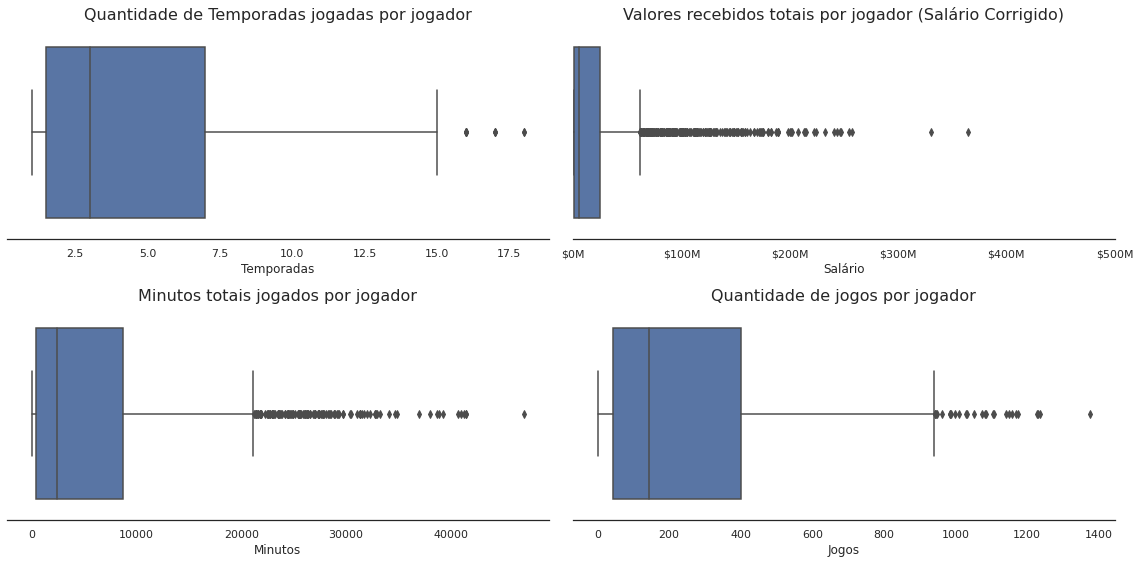

In [20]:
df_train_player = df_train.groupby('PLAYER_NAME')

fig, ax = plt.subplots(2, 2, figsize=(16, 8))

# Boxplot de Temporadas
ax0 = sns.boxplot(x = df_train_player.count()['SEASON_ID'], ax = ax[0][0])
ax0.set_xlabel('Temporadas')
ax0.set_title('Quantidade de Temporadas jogadas por jogador')

# Boxplot de Salário
ax1 = sns.boxplot(x = df_train_player.sum()['SALARY_REAL'], ax = ax[0][1])
ax1.set_xlabel('Salário')
ax1.set(xlim = (0,500000000))
xlabels = ['${:,.0f}'.format(x) + 'M' for x in ax1.get_xticks()/1000000]
ax1.set_xticklabels(xlabels)
ax1.set_title('Valores recebidos totais por jogador (Salário Corrigido)')

# Boxplot de minutos
ax2 = sns.boxplot(x = df_train_player.sum()['MIN'], ax = ax[1][0])
ax2.set_xlabel('Minutos')
ax2.set_title('Minutos totais jogados por jogador')

# Boxplot de jogos
ax3 = sns.boxplot(x = df_train_player.sum()['GP'], ax = ax[1][1])
ax3.set_xlabel('Jogos')
ax3.set_title('Quantidade de jogos por jogador')

plt.tight_layout()
plt.show()

Pelos boxplots gerados, é possível ver que a distribuição de temporadas jogadas, salário recebido, minutos totais jogados e quantidade de jogos jogadas por cada jogador possui uma distribuição *assimétrica à direita*, de modo a ocorrer uma concentração de jogadores nos valores menores e alguns outliers nos valores mais altos.

### 4.3. Correlações

Vamos verificar as correlações das principais estatísticas dos jogadores. Como todas as temporadas estão sendo vistas em conjunto, utilizaremos a coluna de *Salário Real* como parâmetro de comparação, para evitar questões relacionadas a inflação e atualização monetária

In [21]:
def correlation_map(df):
    correlation_table = df.corr()

    plt.figure(figsize=(8, 6))

    mask = np.zeros_like(correlation_table)
    mask[np.triu_indices_from(mask, k=1)] = True

    sns.heatmap(
        correlation_table,
        mask=mask,
        linewidths=.3,
        cmap=sns.diverging_palette(20, 220, as_cmap=True),
        vmin=-1,
        vmax=1,
        annot=True,
        fmt='.2f')
    plt.show()

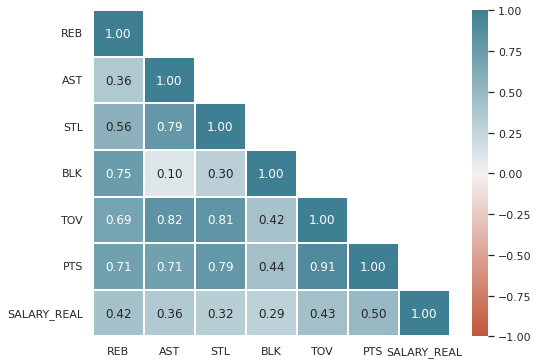

In [22]:
correlation_map(df_train[['REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SALARY_REAL']])

Pelo mapa de correlação é possível verificar que várias estatísticas possuem uma alta correlação, como pontos (*PTS*) que possui uma correlação alta em relação à rebotes (*REB*), assistências (*AST*), roubos (*STL*) e turnover (*TOV*).

Vamos verificar algumas outras correlações e ver como elas se comportam

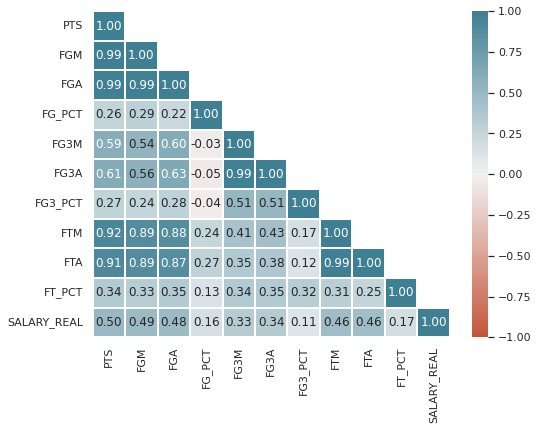

In [23]:
# Atributos ligados a pontuação
correlation_map(df_train[['PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'SALARY_REAL']])

Em relação a pontuação, algumas correlações esperadas foram encontradas, como entre *PTS* e *FGM* (quem faz mais pontos é quem acerta mais arremessos). Por outro lado alguns valores encontrados são interessantes, como a correlação nula entre percentual de arremessos totais acertados (*FG_PCT*) e percentual de arremessos de 3 pontos acertados (*FG3_PCT*).

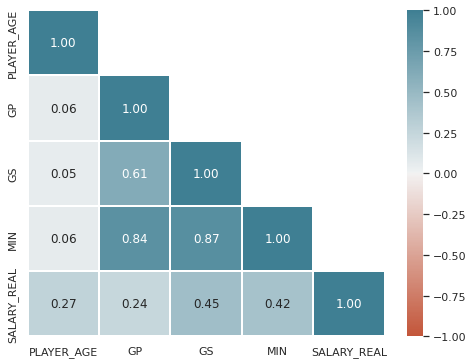

In [24]:
# Atributos ligados a tempo de jogo
correlation_map(df_train[['PLAYER_AGE', 'GP', 'GS', 'MIN', 'SALARY_REAL']])

Em relação a variáveis relacionadas a tempo de jogo, o atributo *GS* (começar o jogo como titular) possui a maior correlação com a variável alvo.

Para tentar evitar a multicolinearidade, vamos transformar algumas colunas para tentar reduzir a correlação entre os atributos. Em relação as estatísticas de pontos, rebotes e assistências, vamos dividi-las pelos minutos jogados para equalizar os atributos. 

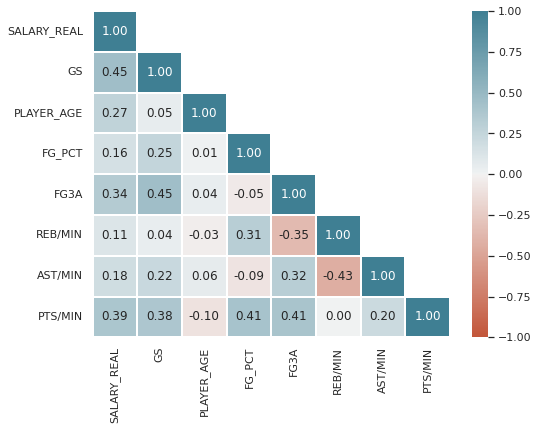

In [25]:
df_feat_select = pd.DataFrame(df_train[['SALARY_REAL', 'GS', 'PLAYER_AGE', 'FG_PCT', 'FG3A']])
df_feat_select['REB/MIN'] = df_train['REB'] / df_train['MIN']
df_feat_select['AST/MIN'] = df_train['AST'] / df_train['MIN']
df_feat_select['PTS/MIN'] = df_train['PTS'] / df_train['MIN']
correlation_map(df_feat_select)

## 5. *Pipeline* de pré-processamento

A partir das observações na análise exploratória, decidimos selecionar seguintes atributos para treinamento de modelos de aprendizado de máquina:
- `GS`: Jogos iniciados pelo jogador como titular
- `PLAYER_AGE`: Idade do jogador
- `FG_PCT`: Percentual de arremessos convertidos
- `FG3A`: Tentativas de arremessos para 3 pontos
- `REB/MIN`: Rebotes por minuto
- `AST/MIN`: Assistências por minuto
- `PTS/MIN`: Pontos por minuto

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

# Transformador para selecionar as features de treinamento do modelo
class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        X_new = X[['GS', 'PLAYER_AGE', 'FG_PCT', 'FG3A']]
        X_new['REB/MIN'] = X['REB'] / X['MIN'].apply(lambda x: 1 if x == 0 else x)
        X_new['AST/MIN'] = X['AST'] / X['MIN'].apply(lambda x: 1 if x == 0 else x)
        X_new['PTS/MIN'] = X['PTS'] / X['MIN'].apply(lambda x: 1 if x == 0 else x)
        return X_new

In [27]:
from sklearn.compose import ColumnTransformer

select_attributes = ['GS', 'PLAYER_AGE', 'FG_PCT', 'FG3A', 'REB', 'AST', 'PTS', 'MIN']

feature_select = ColumnTransformer([
    ('feature_select', FeatureSelector(), select_attributes),
])

## 6. Modelos de Aprendizado de Máquina

### 6.1. Preparação dos dados

Vamos treinar modelos distintos para cada temporada usando as variáveis independentes selecionadas anteriormente. Para equalizar e retirar os efeitos da inflação, vamos utilizar como variável alvo o `SALARY_REAL`.

Primeiramente, vamos separar os conjutos de dado de treinamento e de teste para cada temporada. E, em cada temporada, separamos as variáveis independentes (*features*) e a variável alvo (*target*)

In [28]:
season_keys = sorted(df_train.SEASON_ID.unique())

df_seasons = {}
for season in season_keys:
    train = df_train[df_train['SEASON_ID'] == season].copy()
    X_train = train.drop(columns=['SEASON_ID', 'SALARY_REAL', 'SALARY_NOMINAL'])
    y_train = train['SALARY_REAL'].values
    
    test = df_test[df_test['SEASON_ID'] == season].copy()
    X_test = test.drop(columns=['SEASON_ID', 'SALARY_REAL', 'SALARY_NOMINAL'])
    y_test = test['SALARY_REAL'].values
    
    df_seasons[season] = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }

In [29]:
df_seasons[1991]['X_train'].shape, df_seasons[1991]['y_train'].shape

((272, 22), (272,))

In [30]:
df_seasons[1991]['X_test'].shape, df_seasons[1991]['y_test'].shape

((68, 22), (68,))

### 6.2. Treinamento dos modelos

Para treinar os modelos, utilizaremos o [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para busca dos melhores hiperparâmetros. Será realizada validação cruzada para avaliação do treinamento, utilizando o **Kfold** com 5 grupos.

A métrica utilizada para a avaliação dos modelos será o [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Vamos guardar os tempos de execução de cada modelo, para comparações de execução em diferentes plataformas.

In [32]:
import time

# DF para armazenar o tempo de processamento
times = {}

models = {}

In [33]:
def model_trainer(df_seasons, name, param_grid, pipeline, cv=5, scoring="neg_root_mean_squared_error"):
    
    results = pd.DataFrame(index=df_seasons.keys(), columns=['RMSE', 'model'])
    
    for season, data in df_seasons.items():
        X_train, y_train = data['X_train'], data['y_train']
        X_test, y_test = data['X_test'], data['y_test']
    
        model = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring)
        model.fit(X_train, y_train)
    
        best_model = model.best_estimator_
        y_pred = best_model.predict(X_test)
    
        results.loc[season, :] = [mean_squared_error(y_test, y_pred, squared=False), best_model]
        
    return results

### 6.2.1. LinearRegression

O Primeiro modelo a ser testado será o [Regressão Linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Vamos utilizar o [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) para normalizar os dados.

O único hiperparâmetro a ser testados será o `fit_intercept`.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

name = 'LinearModel'

param_grid = [{
    'regressor__fit_intercept': [False, True]
}]

pipeline = Pipeline([
    ('feature_selector', feature_select),
    ('robust_scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

t_i = time.time()
models[name] = model_trainer(df_seasons, name, param_grid, pipeline)
times[name] = time.time() - t_i

models[name].head(3)

,RMSE,model
1991,1410225.803259,(ColumnTransformer(transformers=[('feature_sel...
1992,1486397.770416,(ColumnTransformer(transformers=[('feature_sel...
1993,1175057.822701,(ColumnTransformer(transformers=[('feature_sel...


### 6.2.2. RandomForestRegressor

O Segundo modelo a ser testado será o [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Utilizando o *GridSearchCV* vamos testar os seguintes hiperparâmetros. 

* `min_samples_split`: O número mínimo de amostras necessárias para dividir um nó interno [2,5]
* `max_depth`: Profundidade máxima da árvore de decisão criada [3,5]
* `min_samples_leaf`: O número mínimo de amostras necessárias para estar em um nó folha [1,3]

O controle dos hiperparâmetros são importantes para evitar o overfit. A métrica utilizada para a avaliação vai ser o [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).



In [34]:
from sklearn.ensemble import RandomForestRegressor

name = 'RandomForestRegressor'

param_grid = [{
    'regressor__min_samples_split': [2, 5],
    'regressor__max_depth': [3, 5],
    'regressor__min_samples_leaf': [1, 3]
}]

pipeline = Pipeline([
    ('feature_selector', feature_select),
    ('regressor', RandomForestRegressor(random_state=99))
])

t_i = time.time()
models[name] = model_trainer(df_seasons, name, param_grid, pipeline)
times[name] = time.time() - t_i

models[name].head(3)

,RMSE,model
1991,1343448.086184,(ColumnTransformer(transformers=[('feature_sel...
1992,1308389.884299,(ColumnTransformer(transformers=[('feature_sel...
1993,1209452.975085,(ColumnTransformer(transformers=[('feature_sel...


### 6.2.3.  AdaBoostRegressor

O [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) tem como princípio combinar em série uma sequência de algoritmos fracos, corrigindo-os e ponderando os erros para construir um modelo mais forte. Esse algoritmo usa como padrão uma árvore de regressão com profundidade máxima igual à 3. Além disso, o AdaBoost utiliza uma função de perda para atualizar e ponderar os pesos após cada intereação de reforço. Utilizando o *GridSearchCV* vamos testar os seguintes hiperparâmetros. 

* `learning_rate`: Peso aplicado a cada regressor em cada iteração de reforço. [1, 0.5, 0.1]
* `loss`: A função de perda a ser usada ao atualizar os pesos após cada iteração de reforço [linear, square, exponential]


In [35]:
from sklearn.ensemble import AdaBoostRegressor

name = 'AdaBoostRegressor'
regressor = AdaBoostRegressor(random_state=99)

param_grid = [{
    'regressor__learning_rate': [1, 0.5, 0.1],
    'regressor__loss': ['linear','square','exponential']
}]

pipeline = Pipeline([
    ('feature_selector', feature_select),
    ('regressor', regressor)
])

t_i = time.time()
models[name] = model_trainer(df_seasons, name, param_grid, pipeline)
times[name] = time.time() - t_i

models[name].head(3)

,RMSE,model
1991,1372815.386377,(ColumnTransformer(transformers=[('feature_sel...
1992,1400558.621961,(ColumnTransformer(transformers=[('feature_sel...
1993,1212015.291764,(ColumnTransformer(transformers=[('feature_sel...


### 6.3 Utilizando PCA

A Análise de componentes principais ou [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) é um técnica de reduçao de dimensionalidade dos dados que projetas os atributos em dimensões inferiores tornando-as independetes. O objetivo do uso do PCA é utilizar todas as estatísticas dos jogadores, encontrando um mecanismo para condensar essas informações em um conjunto reduzido de variáveis perdendo o mínimo de informações possíveis. 
Além de testar os hiperparâmetros dos modelos no GridSearchCV, vamos testar dois hiperparâmetros do PCA:
* `n_components`: número final de dimensões após a redução. [3,5,8].
* `whiten`: Quando True, multiplica os components_vectors pela raiz quadrada de n_samples e dividi pelos valores unitários, garantindo saídas não correlacionadas. Esse proceso remove algunmas informações de sinais mas pode melhorar a precisão preditiva dos estimadores. [True, False]

In [34]:
from sklearn.decomposition import PCA

In [35]:
from sklearn.linear_model import LinearRegression

name = 'LinearModel-PCA'

param_grid = [{
    'pca__n_components': [3, 5, 8],
    'pca__whiten': [False, True],
    'regressor__fit_intercept': [False, True]
}]

pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
])

t_i = time.time()
models[name] = model_trainer(df_seasons, name, param_grid, pipeline)
times[name] = time.time() - t_i

models[name].head(3)

,RMSE,model
1991,1338325.548629,"(RobustScaler(), PCA(n_components=3), LinearRe..."
1992,1324168.287469,"(RobustScaler(), PCA(n_components=8), LinearRe..."
1993,1169379.87459,"(RobustScaler(), PCA(n_components=5), LinearRe..."


In [38]:
from sklearn.ensemble import RandomForestRegressor

name = 'RandomForestRegressor-PCA'
regressor = RandomForestRegressor(random_state=99)

param_grid = [{
    'pca__n_components': [3, 5, 8],
    'pca__whiten': [False, True],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_depth': [3, 5],
    'regressor__min_samples_leaf': [1, 3]
}]

pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
    ('pca', PCA()),
    ('regressor', regressor)
])

t_i = time.time()
models[name] = model_trainer(df_seasons, name, param_grid, pipeline)
times[name] = time.time() - t_i

models[name].head(3)

,RMSE,model
1991,1359342.092265,(ColumnTransformer(transformers=[('all_feature...
1992,1114044.523752,(ColumnTransformer(transformers=[('all_feature...
1993,1127707.671904,(ColumnTransformer(transformers=[('all_feature...


In [39]:
from sklearn.ensemble import AdaBoostRegressor

name = 'AdaBoostRegressor-PCA'
regressor = AdaBoostRegressor(random_state=99)

param_grid = [{
    'pca__n_components': [3, 5, 8],
    'pca__whiten': [False, True],
    'regressor__learning_rate': [1, 0.5, 0.1],
    'regressor__loss': ['linear','square','exponential']
}]

pipeline = Pipeline([
    ('robust_scaler', RobustScaler()),
    ('pca', PCA()),
    ('regressor', regressor)
])

t_i = time.time()
models[name] = model_trainer(df_seasons, name, param_grid, pipeline)
times[name] = time.time() - t_i

models[name].head(3)

,RMSE,model
1991,1363808.043378,(ColumnTransformer(transformers=[('all_feature...
1992,1218171.755641,(ColumnTransformer(transformers=[('all_feature...
1993,1230784.286155,(ColumnTransformer(transformers=[('all_feature...


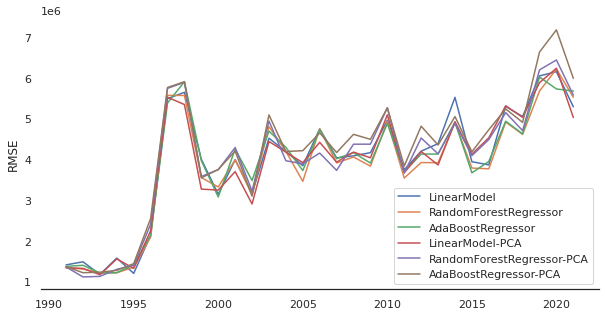

In [40]:
plt.figure(figsize = (10,5))

for name, model in models.items():
    ax = sns.lineplot(x=model.index, y=model.RMSE, label=name)

ax.legend()

In [41]:
times

{'LinearModel': 1.8115057945251465,
 'RandomForestRegressor': 107.08477091789246,
 'AdaBoostRegressor': 57.1187481880188,
 'LinearModel-PCA': 7.2342307567596436,
 'RandomForestRegressor-PCA': 1500.3918874263763,
 'AdaBoostRegressor-PCA': 343.03879404067993}

In [42]:
for name, model in models.items():
    print(f'Modelo {name} - RMSE médio = {model.RMSE.mean().round(0)}')

Modelo LinearModel - RMSE médio = 3953508.0
Modelo RandomForestRegressor - RMSE médio = 3821707.0
Modelo AdaBoostRegressor - RMSE médio = 3896381.0
Modelo LinearModel-PCA - RMSE médio = 3871993.0
Modelo RandomForestRegressor-PCA - RMSE médio = 3994413.0
Modelo AdaBoostRegressor-PCA - RMSE médio = 4162507.0


## 7. Colocando em produção

### 7.1. Gravação do modelo

In [36]:
import joblib

final_model = models['LinearModel-PCA'].model.to_dict()
joblib.dump(final_model, '../data/final_model.joblib')

['../data/final_model.joblib']

### 7.2. Envio para a nuvem

In [47]:
!pip install boto3

In [37]:
import boto3

In [38]:
s3 = boto3.resource('s3')

data = open('../data/final_model.joblib', 'rb')
s3.Bucket('arquivos-grupo5').put_object(Key='models/models.joblib', Body=data)

s3.Object(bucket_name='arquivos-grupo5', key='models/models.joblib')

## 8. Análise de resultados

Todos os modelos testados tiveram um RMSE médio das temporadas bem próximos, exceto o ADABOOST-PCA. A Adição do PCA no pipeline do estimador aumentou o tempo de processamente, principamente devido à adição de novos hiperparâmetros para serem otimizados no GridSearchCV. 

A Regressão Linear foi o único modelo que teve uma melhora no valor do RMSE quando utilizado em conjunto com o PCA, sendo o segundo melhor classificador testado. Esse modelo será colocado em produção em uma aplicação WEB em formato de calculadora.

O RandomForrestRegressor obteve o melhor valor de RMSE porém o maior tempo de processamento em relação aos outros modelos. A adição do PCA obteve uma leve piora no erro do modelo e um aumento de cerca de 14 vezes no tempo de execução.

O AdaBoostRegressor foi o modelo mais afetado pelo PCA. Embora o tempo de processamento não tenha aumentando muito, o RMSE teve um piora significativa.